# Sheet 6 - Practical Exercise

In these exercises, we will work with data that we generate ourselves. Importing an external dataset will not be necessary.

First, run the code cell below to create and visualize two datasets with distinct shapes. (For simplicity, we just use a random state here)

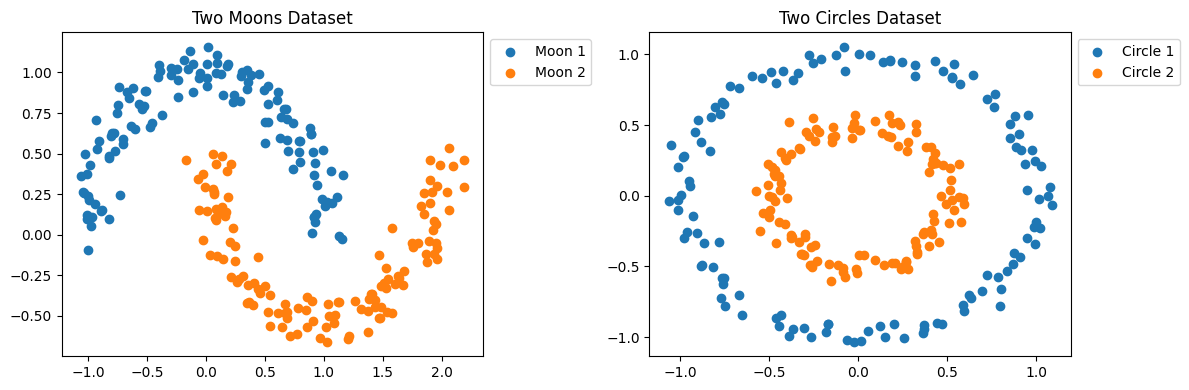

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles

# Generate datasets
X_moons, y_moons = make_moons(n_samples=250, noise=0.1, random_state=21)
X_circles, y_circles = make_circles(n_samples=250, noise=0.05, factor=0.5, random_state=21)

# Plot datasets
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_moons[y_moons == 0][:, 0], X_moons[y_moons == 0][:, 1], label='Moon 1')
plt.scatter(X_moons[y_moons == 1][:, 0], X_moons[y_moons == 1][:, 1], label='Moon 2')
plt.title('Two Moons Dataset')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.subplot(1, 2, 2)
plt.scatter(X_circles[y_circles == 0][:, 0], X_circles[y_circles == 0][:, 1], label='Circle 1')
plt.scatter(X_circles[y_circles == 1][:, 0], X_circles[y_circles == 1][:, 1], label='Circle 2')
plt.title('Two Circles Dataset')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


## Exercise 1

Apply the scikit-learn implementations of k-Means (k = 2) and DBSCAN ($\epsilon$ = 0.2, minPts = 5) to both datasets.

Visualize the results using your preferred visualization library.
How do you assess the cluster qualities?

What happens if you change $\epsilon$ to 0.3 when applying DBSCAN?

/home/minh/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/minh/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


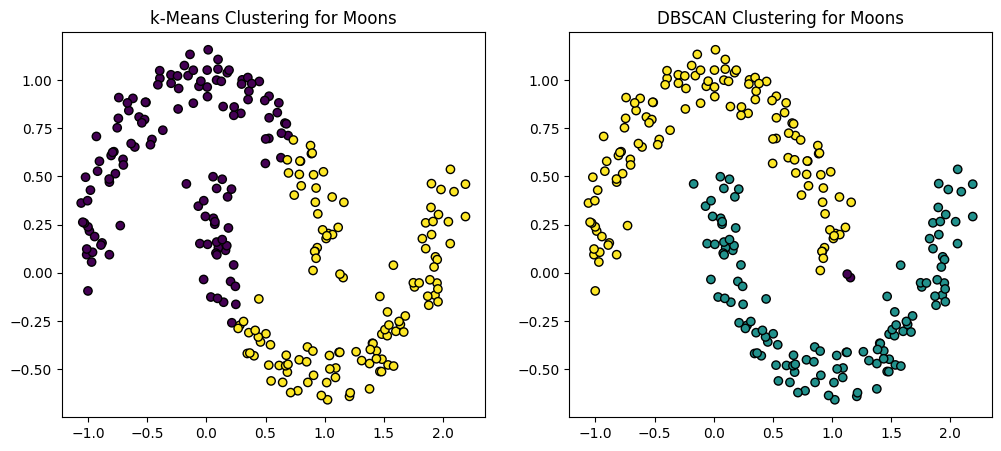

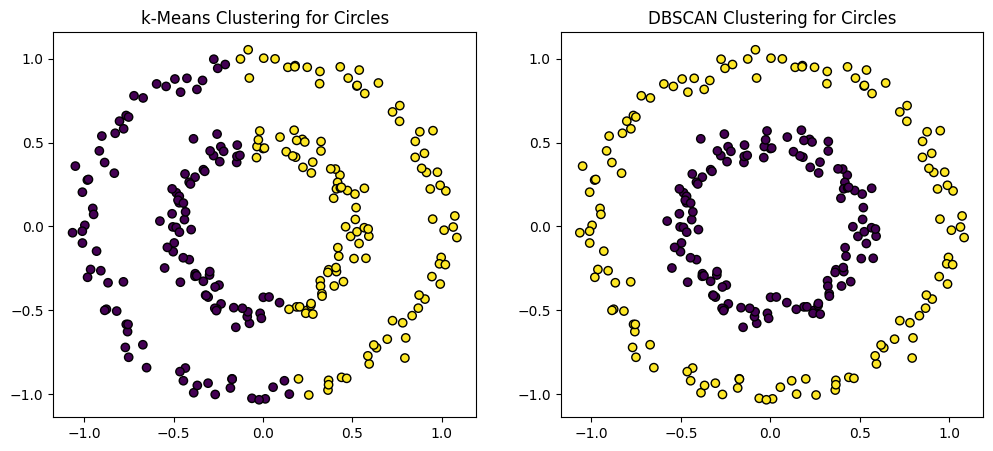

In [4]:
# Add code to import your preferred visualization library (if not matplotlib)

from sklearn.cluster import KMeans, DBSCAN

# Add code to apply k-Means and DBSCAN to the "Two Moons Dataset" and the "Two Circles Dataset"
# Moons
kmeans_moons = KMeans(n_clusters=2, random_state=21)
y_kmeans_moons = kmeans_moons.fit_predict(X_moons)

dbscan_moons = DBSCAN(eps=0.2, min_samples=5)
y_dbscan_moons = dbscan_moons.fit_predict(X_moons)

# Circles
kmeans_circles = KMeans(n_clusters=2, random_state=21)
y_kmeans_circles = kmeans_circles.fit_predict(X_circles)

dbscan_circles = DBSCAN(eps=0.2, min_samples=5)
y_dbscan_circles = dbscan_circles.fit_predict(X_circles)

# Add code to visualize the results
# Moons
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_kmeans_moons, cmap='viridis', edgecolors='k')
plt.title('k-Means Clustering for Moons')

plt.subplot(1, 2, 2)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_dbscan_moons, cmap='viridis', edgecolors='k')
plt.title('DBSCAN Clustering for Moons')

plt.show()

# Circles
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=y_kmeans_circles, cmap='viridis', edgecolors='k')
plt.title('k-Means Clustering for Circles')

plt.subplot(1, 2, 2)
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=y_dbscan_circles, cmap='viridis', edgecolors='k')
plt.title('DBSCAN Clustering for Circles')

plt.show()

### Your answer:
k-Means clustering split the data into 2 clusters through an "invisible" vertical line in both cases, which is wrong for both. DBSCAN did both correctly and can even see outliers for the Moons. 

With $\epsilon$ = 0.3 DBSCAN will incorrectly cluster all data into 1 cluster. 

Text(0.5, 1.0, 'DBSCAN Clustering for Circles')

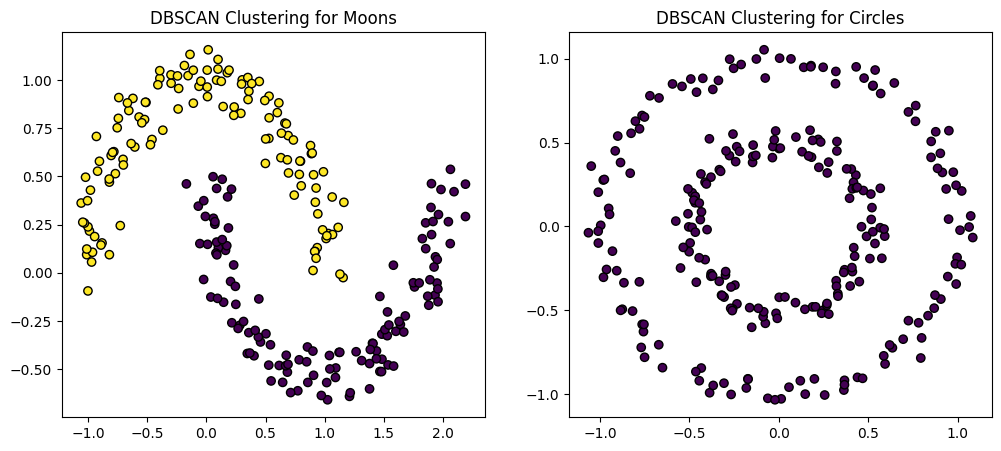

In [5]:
# esp=0.3
# Moons
dbscan_moons_03 = DBSCAN(eps=0.3, min_samples=5)
y_dbscan_moons_03 = dbscan_moons_03.fit_predict(X_moons)

# Circles
dbscan_circles_03 = DBSCAN(eps=0.3, min_samples=5)
y_dbscan_circles_03 = dbscan_circles_03.fit_predict(X_circles)

# Plotting
# Moons
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_dbscan_moons_03, cmap='viridis', edgecolors='k')
plt.title('DBSCAN Clustering for Moons')

# Circles
plt.subplot(1, 2, 2)
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=y_dbscan_circles_03, cmap='viridis', edgecolors='k')
plt.title('DBSCAN Clustering for Circles')



## Exercise 2

Now calculate the silhouette coefficients for your results.

What do you notice compared to the previous visual interpretation of the results? 

Explain why (or why not) the silhouette coefficient seems suitable to quantify the quality of the clusters for our data sets.  

In [12]:
from sklearn.metrics import silhouette_score

# Add code to compute the silhouette coefficients

# k-Means
silhouette_kmeans_moons = silhouette_score(X_moons, y_kmeans_moons)
silhouette_kmeans_circles = silhouette_score(X_circles, y_kmeans_circles)

# DBSCAN
silhouette_dbscan_moons = silhouette_score(X_moons, y_dbscan_moons)
silhouette_dbscan_circles = silhouette_score(X_circles, y_dbscan_circles)

print("Silhouette Coefficients:")
print("k-Means (Moons):", silhouette_kmeans_moons)
print("DBSCAN (Moons):", silhouette_dbscan_moons)
print("k-Means (Circles):", silhouette_kmeans_circles)
print("DBSCAN (Circles):", silhouette_dbscan_circles)


Silhouette Coefficients:
k-Means (Moons): 0.4897123698821742
DBSCAN (Moons): -0.017318222247275993
k-Means (Circles): 0.3526938231752339
DBSCAN (Circles): 0.10660916747776814


### Your answer: 
k-Means Moons and Circles silhouette coefficients are > 0 and near 0.5 -> moderate-well quality of clustering, which is true since in the visualization it got most of the clustering correct. 

DBSCAN Moons and Circles silhouette coefficients are around 0, with Moons < 0 and Circles > 0 -> the distance between clusters is not significant. 


# Help code for task 6.2 calculation

In [13]:
# Original points and (non-)medoids
points = {
    "A": (5, 4),
    "B": (2, 5),
    "C": (1, 7),
    "D": (3, 8),
    "E": (5, 7),
    "F": (9, 4),
    "G": (9, 1),
    "H": (7, 2),
}

medoids = ["A", "E"]

non_medoids = [point for point in points if point not in medoids]

In [15]:
# Help functions: Manhattan dist, select medoids, compute cost, swap points
def mdist(p1, p2):
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])


def select_medoids(points, medoids):
    clusters = {}
    for medoid in medoids:
        clusters[medoid] = {}
    for point in points:
        min_dist = float("inf")
        min_medoid = None
        for medoid in medoids:
            dist = mdist(points[point], points[medoid])
            if dist < min_dist:
                min_dist = dist
                min_medoid = medoid
        clusters[min_medoid][point] = min_dist
    for medoid in medoids:
        clusters[medoid].pop(medoid)
    return clusters


def compute_cost(clusters, points):
    cost = 0
    for medoid in clusters:
        for point in clusters[medoid]:
            cost += mdist(points[point], points[medoid])
    return cost


def swap_point(point_set, p1, p2):
    pointcpy = point_set.copy()
    pointcpy[p1], pointcpy[p2] = pointcpy[p2], pointcpy[p1]
    return pointcpy


def swap_permanently(point_set, p1, p2):
    point_set[p1], point_set[p2] = point_set[p2], point_set[p1]
    return point_set


def costs_on_swap(points, medoids, non_medoids):
    swap_cost_dict = {}
    for medoid in medoids:
        for non_medoid in non_medoids:
            swapped = swap_point(points, medoid, non_medoid)
            swap_cost_dict[(medoid, non_medoid)] = compute_cost(
                select_medoids(swapped, medoids), swapped
            )
    return swap_cost_dict

In [16]:
# Main execution
if __name__ == "__main__":
    # Step 1: For each pair (medoid M, non-medoid N), swap M and N and compute the cost.
    clusters = select_medoids(points, medoids)
    swap_cost_dict = costs_on_swap(points, medoids, non_medoids)
    print(
        "Step 1: for each pair (medoid M, non-medoid N), swap M and N and compute the cost:"
    )
    print(swap_cost_dict)
    for swap in swap_cost_dict:
        print(f"Swapping {swap[0]} and {swap[1]} gives cost {swap_cost_dict[swap]}")

    # Step 2: Select the pair (M, N) with the lowest cost.
    min_cost = float("inf")
    min_swap = None
    for swap in swap_cost_dict:
        if swap_cost_dict[swap] < min_cost:
            min_cost = swap_cost_dict[swap]
            min_swap = swap
    print("\nStep 2: Select the pair (M, N) with the lowest cost:")
    print(min_swap, "=", min_cost, "\n")

    # Step 3: If TD_curr < TD_swap, then swap M and N permanently.
    td_curr = compute_cost(clusters, points)
    td_swap = min_cost
    print("Step 3: If TD_curr < TD_swap, then swap M and N permanently:")
    print("TD_curr =", td_curr)
    print("TD_swap =", td_swap)
    if td_curr < td_swap:
        print("TD_curr < TD_swap, so swap M and N permanently.")
        points = swap_permanently(points, min_swap[0], min_swap[1])
        td_curr = td_swap
    else:
        print("TD_curr >= TD_swap, so do not swap M and N permanently.")

    # In case of using set N as medoid instead:
    medoids, non_medoids = non_medoids, medoids
    hypo_swap_cost = costs_on_swap(points, medoids, non_medoids)
    print("\nIn case of using set N as medoid instead:")
    print(hypo_swap_cost)


Step 1: for each pair (medoid M, non-medoid N), swap M and N and compute the cost:
{('A', 'B'): 33, ('A', 'C'): 33, ('A', 'D'): 34, ('A', 'F'): 22, ('A', 'G'): 21, ('A', 'H'): 22, ('E', 'B'): 25, ('E', 'C'): 24, ('E', 'D'): 25, ('E', 'F'): 27, ('E', 'G'): 26, ('E', 'H'): 27}
Swapping A and B gives cost 33
Swapping A and C gives cost 33
Swapping A and D gives cost 34
Swapping A and F gives cost 22
Swapping A and G gives cost 21
Swapping A and H gives cost 22
Swapping E and B gives cost 25
Swapping E and C gives cost 24
Swapping E and D gives cost 25
Swapping E and F gives cost 27
Swapping E and G gives cost 26
Swapping E and H gives cost 27

Step 2: Select the pair (M, N) with the lowest cost:
('A', 'G') = 21 

Step 3: If TD_curr < TD_swap, then swap M and N permanently:
TD_curr = 26
TD_swap = 21
TD_curr >= TD_swap, so do not swap M and N permanently.

In case of using set N as medoid instead:
{('B', 'A'): 6, ('B', 'E'): 6, ('C', 'A'): 6, ('C', 'E'): 6, ('D', 'A'): 6, ('D', 'E'): 6, ('F